In [1]:
try:
    import ase
    print("successfully imported ase")
except ImportError:
    !! pip install ase --user --upgrade
    print("completed installing ASE")

successfully imported ase


In [2]:
try:
    import torch
    print("successfully imported torch")
except ImportError:
    !! pip install torch --user --upgrade
    print("completed installing torch")

successfully imported torch


In [3]:
try:
    import dscribe
    print("successfully imported dscribe")
except ImportError:
    !! pip install dscribe --user --upgrade
    print("completed installing dscribe")

successfully imported dscribe


In [4]:
try:
    import numpy as np
    print("successfully imported numpy")
except ImportError:
    !! pip install numpy --user --upgrade
    print("completed installing numpy")

successfully imported numpy


In [5]:
try:
    from matplotlib import pyplot as plt
    print("successfully imported matplotlib")
except ImportError:
    !! pip install matplotlib --user --upgrade
    print("completed installing matplotlib")

successfully imported matplotlib


In [6]:
!! pip install aenet-gpr --user --upgrade
print("completed installing aenet-gpr")

import aenet_gpr
print(aenet_gpr.__version__)

completed installing aenet-gpr
1.1.6


# 1. Prepare training/test data

We are using train/test data of H-H Lennard-Jones potential prepared in `aenet-gpr/example/1_H2/`

In [7]:
import os.path

if os.path.isdir("./1_H2/"):
    ! mkdir 1_H2
    
if os.path.isfile("../example/1_H2/train_set.zip"):
    ! unzip -oq ../example/1_H2/train_set.zip -d ./1_H2/
else:
    ! wget https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/1_H2/train_set.zip
    ! unzip -oq train_set.zip -d ./1_H2/
    ! rm train_set.zip

--2025-05-15 21:21:15--  https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/1_H2/train_set.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/1_H2/train_set.zip [following]
--2025-05-15 21:21:15--  https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/1_H2/train_set.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4676 (4.6K) [application/zip]
Saving to: ‘train_set.zip’

train_set.zip       100%[===================>]   4.57K  --.-KB/s    in 0s      

2025-05-15 21:21:15 (18.2 MB/s) - ‘train_set.zip’ 

In [8]:
if os.path.isfile("../example/1_H2/test_set.zip"):
    ! unzip -oq ../example/1_H2/test_set.zip -d ./1_H2/
else:
    ! wget https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/1_H2/test_set.zip
    ! unzip -oq test_set.zip -d ./1_H2/
    ! rm test_set.zip

--2025-05-15 21:21:16--  https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/1_H2/test_set.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/1_H2/test_set.zip [following]
--2025-05-15 21:21:16--  https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/1_H2/test_set.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 122489 (120K) [application/zip]
Saving to: ‘test_set.zip’

test_set.zip        100%[===================>] 119.62K  --.-KB/s    in 0.003s  

2025-05-15 21:21:16 (34.8 MB/s) - ‘test_set.zip’ sav

# 2. Train–Test execute

In addition to the reference data files, following aenet-gpr input file `train.in` is all you need to run aenet-gpr. 

Most of the contents are set to default parameters, which can also be deleted.

In [9]:
if os.path.isfile("../example/1_H2/train.in"):
    ! cp ../example/1_H2/train.in .
else:
    ! wget https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/1_H2/train.in

--2025-05-15 21:21:38--  https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/1_H2/train.in
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/1_H2/train.in [following]
--2025-05-15 21:21:38--  https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/1_H2/train.in
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 530 [text/plain]
Saving to: ‘train.in’

train.in            100%[===================>]     530  --.-KB/s    in 0s      

2025-05-15 21:21:38 (7.90 MB/s) - ‘train.in’ saved [530/530]



In [10]:
! cat train.in

# File path
Train_file ./1_H2/train_set/file_*.xsf
Test_file ./1_H2/test_set/file_*.xsf

# File format (default: xsf)
File_format xsf

# Descriptor (default: cartesian coordinates)
Descriptor cart

# Uncertainty estimation (default: True)
Get_variance True

# Kernel parameter
scale 0.4
weight 1.0

# Chunking to reduce memory usage (default: 25)
batch_size 25

# Flags for xsf file writing (default: False)
Train_write False
Test_write False
Additional_write False

# Data augmentation parameter
# Disp_length 0.05
# Num_copy 20


In [11]:
! python -m aenet_gpr train.in

aenet-GPR: surrogate GPR for GPR-ANN indirect force training

2025-05-15 21:22:06.

Developed by In Won Yeu

This program performs three main steps:
1. Train: Generates a GPR model using the provided structure, energy, and force data.
2. Test: Uses the generated GPR model to predict values for the test set structures.
3. Augmentation: Performs data augmentation in xsf file format, compatible with aenet-(PyTorch),
supporting a GPR-ANN training in conjunction with aenet-(PyTorch).

Each of these steps is executed once the input file (train.in) contains the keywords:
Train_file [train file path]
Test_file [test file path]
Additional_write [True]


Train

Read reference training data

Time needed for reading data:            0.003696 s
Maximum CPU memory used:             0.544567 GB
Maximum GPU memory used:             0.000000 GB
Energy data size: (7,)  # (N_data, )
Force data size: (7, 2, 3)  # (N_data, N_atom, 3)
----------------------------------------------------------------------
--

# 3. Visualize the results

In [12]:
energy_test_gpr = np.load("./energy_test_gpr.npy")
energy_test_reference = np.load("./energy_test_reference.npy")
force_test_gpr = np.load("./force_test_gpr.npy")
force_test_reference = np.load("./force_test_reference.npy")
uncertainty_test_gpr = np.load("./uncertainty_test_gpr.npy")

In [13]:
n_test = 200
d_test = np.linspace(0.95, 2.05, n_test)  # H-H bond distance

n_train = 7
d_train = np.linspace(1.0, 2.0, n_train)  # H-H bond distance

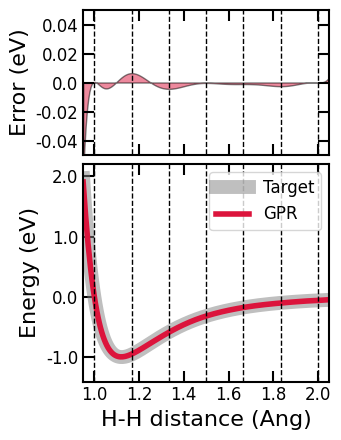

In [14]:
fig = plt.figure(figsize=(3.5, 4.5))
ax2, ax3 = fig.subplots(2, 1, height_ratios=[1, 1.5], sharex=False, sharey=False)

font_x = {'size': 16, 'color': 'black'}
font_y = {'size': 16, 'color': 'black'}
font_tick = {'size': 12, 'color': 'black'}


# The second plot
ax2.fill_between(d_test, np.subtract(energy_test_gpr, energy_test_reference), 0, color='crimson', alpha=0.5, edgecolor='black')
ax2.vlines(d_train, ymin=-100, ymax=100, color='black', linestyle='--', linewidth=1)

ax2.set_xlim([0.95, 2.05])
x_labels = [round(label, 2) for label in ax2.get_xticks()]
ax2.set_xticks(x_labels)
ax2.set_xlim([0.95, 2.05])
ax2.set_xticklabels(x_labels, fontdict=font_tick)

ax2.set_ylabel("Error (eV)", fontdict=font_y)
ax2.set_ylim([-0.05, 0.05])
y_labels = [round(label, 2) for label in ax2.get_yticks()]
y_labels = [-0.04, -0.02, 0.0, 0.02, 0.04]
ax2.set_yticks(y_labels)
ax2.set_ylim([-0.05, 0.05])
ax2.set_yticklabels(y_labels, fontdict=font_tick)

[x.set_linewidth(1.5) for x in ax2.spines.values()]
ax2.tick_params(bottom=True, top=True, left=True, right=True)
ax2.tick_params(labelbottom=False, labeltop=False, labelleft=True, labelright=False)
ax2.tick_params(direction='in', length=8, width=1.5)


# The third plot
ax3.plot(d_test, energy_test_reference, '-', label='Target', color='gray', alpha=0.5, linewidth=10)
ax3.plot(d_test, energy_test_gpr, '-', label='GPR', color='crimson', linewidth=4)
ax3.vlines(d_train, ymin=-100, ymax=100, color='black', linestyle='--', linewidth=1)

ax3.set_xlabel('H-H distance (Ang)', fontdict=font_x)
ax3.set_xlim(0.95, 2.05)
x_labels = [round(label, 2) for label in ax3.get_xticks()]
ax3.set_xticks(x_labels)
ax3.set_xticklabels(x_labels, fontdict=font_tick)
ax3.set_xlim(0.95, 2.05)

ax3.set_ylabel('Energy (eV)', fontdict=font_y)
ax3.set_ylim(-1.4, 2.2)
y_labels = [round(label, 2) for label in ax3.get_yticks()]
# y_labels = [-1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0]
ax3.set_yticks(y_labels)
ax3.set_yticklabels(y_labels, fontdict=font_tick)
ax3.set_ylim(-1.4, 2.2)

ax3.legend(loc='upper right', fontsize=12, ncol=1, frameon=True)
[x.set_linewidth(1.5) for x in ax3.spines.values()]
ax3.tick_params(bottom=True, top=True, left=True, right=False)
ax3.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax3.tick_params(direction='in', length=8, width=1.5)

fig.tight_layout()
plt.subplots_adjust(hspace=0.05, wspace=0.05)
plt.show()

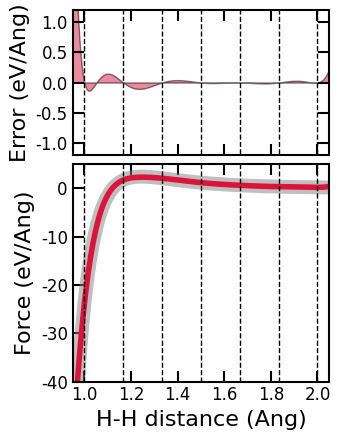

In [15]:
fig = plt.figure(figsize=(3.5, 4.5))
ax2, ax3 = fig.subplots(2, 1, height_ratios=[1, 1.5], sharex=False, sharey=False)

font_x = {'size': 16, 'color': 'black'}
font_y = {'size': 16, 'color': 'black'}
font_tick = {'size': 12, 'color': 'black'}


# The second plot
ax2.fill_between(d_test, np.subtract(force_test_gpr[:, 0, 0], force_test_reference[:, 0, 0]), 0, color='crimson', alpha=0.5, edgecolor='black')
ax2.vlines(d_train, ymin=-100, ymax=100, color='black', linestyle='--', linewidth=1)

ax2.set_xlim([0.95, 2.05])
x_labels = [round(label, 2) for label in ax2.get_xticks()]
ax2.set_xticks(x_labels)
ax2.set_xlim([0.95, 2.05])
ax2.set_xticklabels(x_labels, fontdict=font_tick)

ax2.set_ylabel("Error (eV/Ang)", fontdict=font_y)
ax2.set_ylim([-1.2, 1.2])
y_labels = [round(label, 2) for label in ax2.get_yticks()]
y_labels = [-1.0, -0.5, 0.0, 0.5, 1.0]
ax2.set_yticks(y_labels)
ax2.set_ylim([-1.2, 1.2])
ax2.set_yticklabels(y_labels, fontdict=font_tick)

[x.set_linewidth(1.5) for x in ax2.spines.values()]
ax2.tick_params(bottom=True, top=True, left=True, right=True)
ax2.tick_params(labelbottom=False, labeltop=False, labelleft=True, labelright=False)
ax2.tick_params(direction='in', length=8, width=1.5)


# The third plot
ax3.plot(d_test, force_test_reference[:, 0, 0], '-', label='Target', color='gray', alpha=0.5, linewidth=10)
ax3.plot(d_test, force_test_gpr[:, 0, 0], '-', label='GPR', color='crimson', linewidth=4)
ax3.vlines(d_train, ymin=-100, ymax=100, color='black', linestyle='--', linewidth=1)


ax3.set_xlabel('H-H distance (Ang)', fontdict=font_x)
ax3.set_xlim(0.95, 2.05)
x_labels = [round(label, 2) for label in ax3.get_xticks()]
ax3.set_xticks(x_labels)
ax3.set_xticklabels(x_labels, fontdict=font_tick)
ax3.set_xlim(0.95, 2.05)

ax3.set_ylabel('Force (eV/Ang)', fontdict=font_y)
ax3.set_ylim(-40, 5)
y_labels = [int(label) for label in ax3.get_yticks()]
# y_labels = [-40, -30, -20, -10, 0]
ax3.set_yticks(y_labels)
ax3.set_yticklabels(y_labels, fontdict=font_tick)
ax3.set_ylim(-40, 5)

# ax3.legend(loc='lower right', fontsize=12, ncol=1, frameon=True)
[x.set_linewidth(1.5) for x in ax3.spines.values()]
ax3.tick_params(bottom=True, top=True, left=True, right=False)
ax3.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax3.tick_params(direction='in', length=8, width=1.5)

fig.tight_layout()
plt.subplots_adjust(hspace=0.05, wspace=0.05)
plt.show()